# Prvočísla - Eratosthenovo síto

Idea: Není třeba kontrolovat dělitelnost každým číslem menším než je to aktuální. Stačí kontrolova dělitelnost prvočísly. Např. pokud číslo není dělitelné 7, nemůže být dělitelné ani 14, 21 atd.

In [ ]:
primes = []
skip = False
limit = 100

for i in range(2, limit + 1):
    for x in primes:
        if i%x == 0:
            skip = True
            break
    if not skip:
        primes.append(i)
    skip = False

print(primes)

In [ ]:
primes = []
skip = False
N = 10
i = 2
while len(primes) < N:
    for x in primes:
        if i%x == 0:
            skip = True
            break
    if not skip:
        primes.append(i)
    skip = False
    i += 1

print(primes)

## Monte Carlo - obsah kruhu

Monte Carlo je třída metod využívajících náhodná čísla k řešení problémů. My zde zkusíme aproximovat hodnotu čísla $\pi$. Číslo $\pi$ vyjadřuje poměr mezi obsahem kruhu s poloměrem $r$ a čtvercem o hraně $r$. Představmě si čtverec opsaný kruhu (tj. čtverec o hraně $2r$ s kruhem ve svém středu). Program bude náhodně generovat souřadnice bodů $x$, $y$ uvnitř čtvercee a bude ověřovat, zda se nachází i uvnitř kruhu. Číslo $\pi$ pak půjde odhadnout, zhruba jako poměr bodů v kruhu ku celkovému počtu.

Funkce `random.random()` generuje náhodná čísla v rozmezí $[0,1)$, takže hrana našeho čtverce bude mít velikost $1$. Kruh vepsaný tomuto čtverci tak bude mít střed na souřadnicích $[0.5, 0.5]$ a poloměr $r=0.5$. Souřadnice bodů ležících uvnitř kruhu tedy musí splňovat nerovnici

$$
(x-0.5)^2 + (y-0.5)^2 \leq 0.5^2
$$


Obsah čtverce
$$
S_c = a^2
$$
Obsah maximálního vepsaného kruhu
$$
S_k = \pi \left(\frac{a}{2}\right)^2
$$

$$
\frac{S_k}{S_c} = \frac{\pi}{4}
$$
neboli
$$
\pi = 4\frac{S_k}{S_c}
$$



In [ ]:
import random as r


def in_circle(x, y):
    if (x-0.5)**2 + (y-0.5)**2 <= 0.25:
        return True
    return False

inside = 0
N = 10000

for i in range(N):
    x , y = r.random(), r.random()
    if in_circle(x, y):
        inside += 1
        
pi = 4 * inside / N
pi

# Fibonacci

In [ ]:
a, b = 0, 1

f = [b]
for _ in range(10):
    a, b = b, a+b
    f.append(b)

f

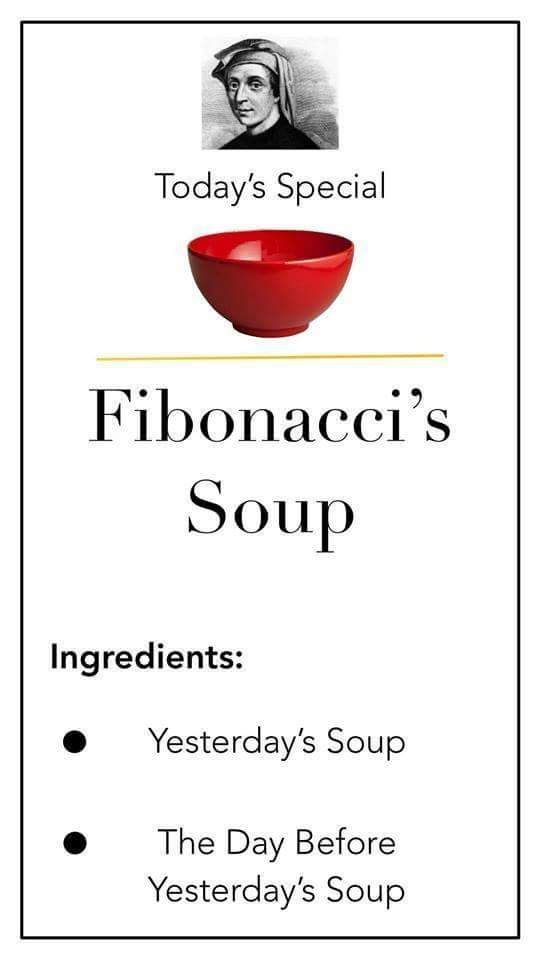

## Zlatý řez

Říkáme, že obdélník a o stranách $a$, $b$ je v poměru zlatého řezu, pokud pro jeho strany platí

$$
\frac{a}{a+b} = \frac{b}{a}
$$

Pokud si některou ze stran zvolíme jako jednotku, dostaneme kvadratickou rovnici. Tj. pro $b=1$

\begin{align}
\frac{a}{a+1} &= \frac{1}{a} \\
a^2 &= a + 1 \\
a^2-a-1 &= 0
\end{align}

$$
a_{1,2} = \frac{1\pm\sqrt{5}}{2}
$$

In [ ]:
def golden_ration(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a+b
    return b/a

golden_ration(100)

In [4]:
from math import sqrt

a, b = 0.5*(1+sqrt(5)), 0.5*(1-sqrt(5))
a, b, -1/a, -1/b

(1.618033988749895,
 -0.6180339887498949,
 -0.6180339887498948,
 1.6180339887498947)

# Rekurze

## Faktoriál

V kombinatorice se často užívá symbolu $n!$, čteme $n$-faktoriál. Je definován takto:

$$
n! = \prod\limits_{i=1}^{n} i = n \cdot (n-1) \cdot \dots \cdot 2 \cdot 1
$$

Např.
$$
2! = 2\\
3! = 6\\
4! = 24
$$

Dodatečně se obvykle definuje $0! = 1$.

Naprogramujte:
- funkci, která spočítá faktoriál čísla $n$
- funkci, která spočítá faktoriál čísla $n$ rekurzivně (tj. funkce volá sama sebe)

In [ ]:
def faktorial1(n):
    if n > 1:
        return n * faktorial1(n-1)
    else:
        return 1
    
def faktorial2(n):
    if n > 1:
        res = 1
        for i in range(2, n+1):
            res *= i
        return res
    return 1

## Pretty print slovniku

In [ ]:
def pretty_print(d, indent = 0, c = "\t"):
    white = indent * c
    for key, val in d.items():
        if type(val) == dict:
            print(white + "{}: {{".format(key))
            pretty_print(val, indent + 1, c)
            print(white + "}")
        else:
            print(white + "{}: {}".format(key, val))
        
d = dict(
    jmeno = "Vaclav",
    prijmeni = "Alt",
    adresa = dict(
        ulice = "Na Konci",
        cislo = "1",
        mesto = "Ricany"
    )
)
pretty_print(d, 0, "  ")

# Newtonova metoda tečen


In [ ]:
def f(x):
    return x**2 - 2

def df(x):
    return 2*x


x = 2.5
for i in range(10):
    x = x - f(x) / df(x)
    
x

In [ ]:
def f(x):
    return x**2 - 2

def df(x):
    return 2*x

eps = 1e-15

x = 10
xold = 1000
i = 1
while abs(x - xold) > eps: 
    xold = x
    x = x - f(x) / df(x)
    i += 1
    
x, i

# Bisekce

In [ ]:
a = 0 
b = 2

def f(x):
    return x**2 - 2

eps = 1e-15
if f(a) * f(b) > 0:
    print("bad boundaries")
    exit()

i = 0
while abs(a-b) > eps:
    i += 1
    mid = a + 0.5 * (b-a)
    if f(mid) * f(b) < 0:
        a = mid
    elif f(a) * f(mid) < 0:
        b = mid
    else:
        print("bad boundaries")
        exit()
        
a, i

In [ ]:
a = 0 
b = 2

def f(x):
    return x**2 - 2

def bisection(f, a, b, eps = 1e-15, maxit = 1000):
    if f(a) * f(b) > 0:
        print("bad boundaries")
        exit()

    i = 0
    while abs(a-b) > eps:
        i += 1
        if i > maxit:
            break
        mid = a + 0.5 * (b-a)
        if f(mid) * f(b) < 0:
            a = mid
        elif f(a) * f(mid) < 0:
            b = mid
        else:
            print("bad boundaries")
            exit()
    return a, i
bisection(f, 0, 2)

## lambda funkce

In [ ]:
bisection(lambda x: x**2 - 9, 1, 10.2, 1e-14)